## Flexibility correlation
Do the pLDDT values correlate with apo-holo distance? Let's validate this using the CryptoBench dataset.

In [10]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
import os

pLDDT_DIRECTORY = '/home/skrhakv/cryptic-nn/final-data/cryptobench/plDDT'
APO_HOLO_DISTANCE_DIRECTORY = '/home/skrhakv/cryptic-nn/final-data/cryptobench/residue-distances'

pLDDTs = []
apo_holo_distances = []

for file in os.listdir(APO_HOLO_DISTANCE_DIRECTORY):
    assert file in os.listdir(pLDDT_DIRECTORY), f'File {file} not found in pLDDT directory'
    pLDDT = np.load(os.path.join(pLDDT_DIRECTORY, file))
    apo_holo_distance = np.load(os.path.join(APO_HOLO_DISTANCE_DIRECTORY, file))
    assert pLDDT.shape == apo_holo_distance.shape, f'Shape mismatch for file {file}: {pLDDT.shape} vs {apo_holo_distance.shape}'
    pLDDTs.append(pLDDT[(pLDDT != -100) & (apo_holo_distance != -1)])
    apo_holo_distances.append(apo_holo_distance[(pLDDT != -100) & (apo_holo_distance != -1)])



pLDDTs = np.concatenate(pLDDTs)
apo_holo_distances = np.concatenate(apo_holo_distances)
correlation, p_value = pearsonr(pLDDTs, apo_holo_distances)
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')

correlation_spearman, p_value_spearman = spearmanr(pLDDTs, apo_holo_distances)
print(f'Spearman correlation coefficient: {correlation_spearman}')
print(f'p-value (Spearman): {p_value_spearman}')


Pearson correlation coefficient: -0.3831563448187118
p-value: 0.0
Spearman correlation coefficient: -0.3656944577100296
p-value (Spearman): 0.0


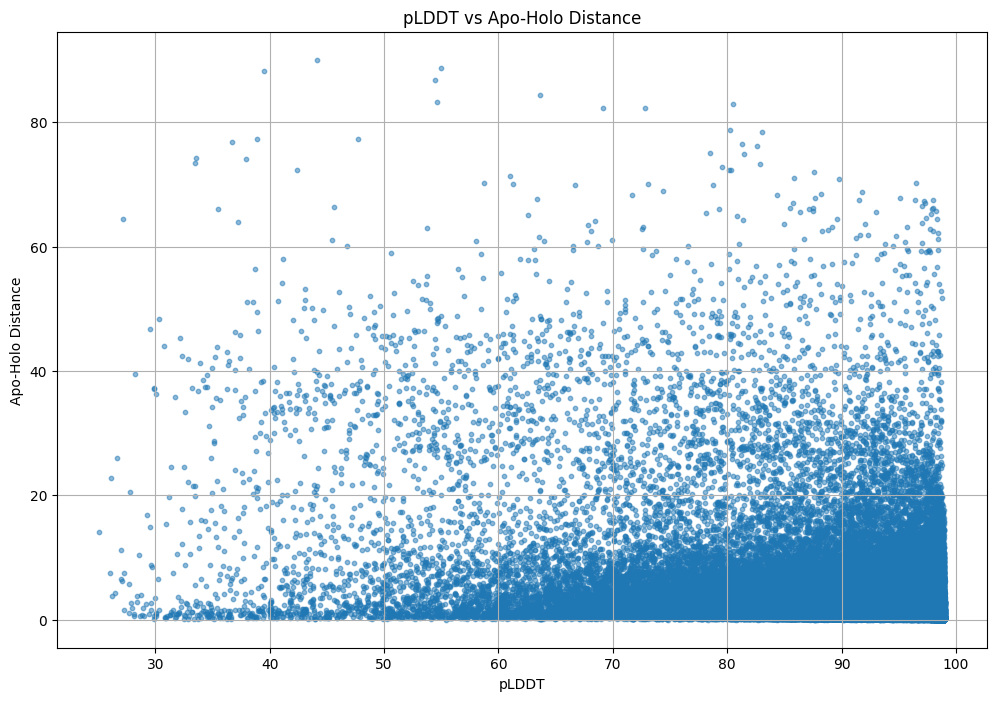

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(pLDDTs, apo_holo_distances, alpha=0.5, s=10)
plt.xlabel('pLDDT')
plt.ylabel('Apo-Holo Distance')
plt.title('pLDDT vs Apo-Holo Distance')
plt.grid(True)
plt.show()